## 目录
1. 两种自定义因子的方法——add_formula&append_df
2. 什么是事件？（0/1因子）
3. 事件选股效果的可视化

In [1]:
from jaqs.data import DataView 
import warnings

warnings.filterwarnings("ignore")
dataview_folder = '../../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


### 1、两种自定义因子的方法——add_formula&append_df
dataview可以通过两种方式计算/添加自定义因子进行分析

In [2]:
# 方法1：add_formula 基于dataview里已有的字段,通过表达式定义因子
dv.add_formula("momentum", "Return(close_adj, 20)", is_quarterly=False)
dv.get_ts("momentum").head()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,-0.100735,-0.085812,-0.057592,-0.006342,-0.100442,-0.051708,-0.068143,0.012426,-0.074534,-0.089580,...,-0.140442,NaN,-0.065375,0.104574,NaN,NaN,NaN,NaN,NaN,-0.084892
20140103,-0.111690,-0.102975,-0.052910,-0.040881,-0.116740,-0.078923,-0.082474,0.048699,-0.091097,-0.111111,...,-0.167112,NaN,-0.075426,0.105497,NaN,NaN,NaN,NaN,NaN,-0.091437
20140106,-0.121896,-0.137255,-0.095643,-0.059129,-0.165380,-0.111576,-0.106164,0.011311,-0.098121,-0.134470,...,-0.214003,NaN,-0.085575,0.132137,NaN,NaN,NaN,NaN,NaN,-0.123726
20140107,-0.118271,-0.138051,-0.109342,-0.060228,-0.174342,-0.122535,-0.104991,0.039841,-0.095745,-0.139847,...,-0.200000,NaN,-0.088020,0.076545,NaN,NaN,NaN,NaN,NaN,-0.118594
20140108,-0.115124,-0.144175,-0.159346,-0.063224,-0.179235,-0.160665,-0.093103,0.066347,-0.081023,-0.156604,...,-0.216033,NaN,-0.085575,0.118630,NaN,NaN,NaN,NaN,NaN,-0.127941


In [3]:
# 方法2: append_df 构造一个因子表格（pandas.Dataframe）,直接添加到dataview当中
import pandas as pd
import talib as ta

close = dv.get_ts("close_adj").dropna(how='all', axis=1)
slope_df = pd.DataFrame({sec_symbol: -ta.LINEARREG_SLOPE(value.values, 10) for sec_symbol, value in close.iteritems()}, index=close.index)
dv.append_df(slope_df,'slope')
dv.get_ts("slope")

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20140114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2、什么是事件？

事件是因子的一种特殊形式，用1/0/-1表示。
比方说，我们可以定义长短期均线金叉为一个事件，股价走势发生金叉记为1，死叉记为-1，其他记位0。
通过事件分析，可以测试某个事件和股票未来收益的关系。

运用上面提供的自定义因子方法，构造一个5日/10日均线的金叉事件

In [4]:
from jaqs.research.signaldigger import process

Open = dv.get_ts("open_adj")
High = dv.get_ts("high_adj")
Low = dv.get_ts("low_adj")
Close = dv.get_ts("close_adj")
trade_status = dv.get_ts('trade_status')
mask_sus = trade_status == u'停牌'
# 剔除掉停牌期的数据　再计算指标
open_masked = process._mask_df(Open,mask=mask_sus)
high_masked = process._mask_df(High,mask=mask_sus)
low_masked = process._mask_df(Low,mask=mask_sus)
close_masked = process._mask_df(Close,mask=mask_sus)

In [5]:
from jaqs.data import signal_function_mod as sfm
MA5 = sfm.ta('MA',0 , open_masked, high_masked, low_masked, close_masked, 5)
MA10 = sfm.ta('MA',0 , open_masked, high_masked, low_masked, close_masked, 10)
dv.append_df(MA5,'MA5')
dv.append_df(MA10,'MA10')

In [6]:
# 定义金叉事件
dv.add_formula("Cross","(MA5>=MA10)&&(Delay(MA5<MA10, 1))",is_quarterly=False)

事件分析

In [7]:
import numpy as np

#定义信号过滤条件-非指数成分
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = df_index_member == 0
    return mask_index_member

# 定义可买卖条件——未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == u'停牌'
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

In [8]:
from jaqs.research import SignalDigger
obj = SignalDigger(output_folder='./output',
                   output_format='pdf')

# 和处理因子的步骤一样 n_quantiles=1
# 不传入benchmark 可以分析绝对收益
obj.process_signal_before_analysis(signal=dv.get_ts("Cross"),
                                   price=dv.get_ts("close_adj"),
                                   high=dv.get_ts("high_adj"), # 可为空
                                   low=dv.get_ts("low_adj"),# 可为空
                                   n_quantiles=1,# quantile分类数
                                   mask=mask,# 过滤条件
                                   can_enter=can_enter,# 是否能进场
                                   can_exit=can_exit,# 是否能出场
                                   period=15,# 持有期
                                   # benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                   commission = 0.0008,
                                   )
signal_data = obj.signal_data
signal_data.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


signal    return  upside_ret  downside_ret  quantile
trade_date symbol                                                         
20140117   000001.SZ     0.0  0.051465    0.088050     -0.033901         1
           000002.SZ     0.0  0.040160    0.119256     -0.006450         1
           000009.SZ     0.0  0.264483    0.322153     -0.012334         1
           000012.SZ     0.0  0.097084    0.130152     -0.008737         1
           000024.SZ     0.0  0.064774    0.155523     -0.008997         1

In [9]:
from jaqs.research.signaldigger.analysis import analysis
result = analysis(signal_data, is_event=True, period=15)
print("——选股收益分析——")
print(result["ret"])
print("——最大潜在盈利/亏损分析——")
print(result["space"])

——选股收益分析——
               long_ret  long_short_ret
t-stat        13.809555        2.814653
p-value        0.000000        0.005000
skewness       0.678439       -0.521729
kurtosis       5.832069        4.887128
Ann. Ret       0.195429        0.134306
Ann. Vol       0.425952        0.346352
Ann. IR        0.458804        0.387773
occurance  14617.000000      851.000000
——最大潜在盈利/亏损分析——
                               long_space
upside_space_mean                0.083199
upside_space_std                 0.090546
upside_space_mean/std            0.918863
upside_space_max                 1.191577
upside_space_min                -0.100932
upside_space_percentile25        0.023132
upside_space_percentile50        0.057588
upside_space_percentile75        0.112567
upside_space_occurance       14617.000000
downside_space_mean             -0.064763
downside_space_std               0.071093
downside_space_mean/std         -0.910964
downside_space_max               0.099347
downside_space_min       



Value of signals of Different Quantiles Statistics
          min  max      mean       std   count  count %
quantile                                               
1         0.0  1.0  0.057745  0.233261  253131    100.0
Figure saved: E:\QTC\PythonQTC\course\4_Selection\Richard\output\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.004
IC Std.      0.085
t-stat(IC)  -1.496
p-value(IC)  0.135
IC Skew     -0.205
IC Kurtosis  1.219
Ann. IR     -0.052
Figure saved: E:\QTC\PythonQTC\course\4_Selection\Richard\output\information_report.pdf


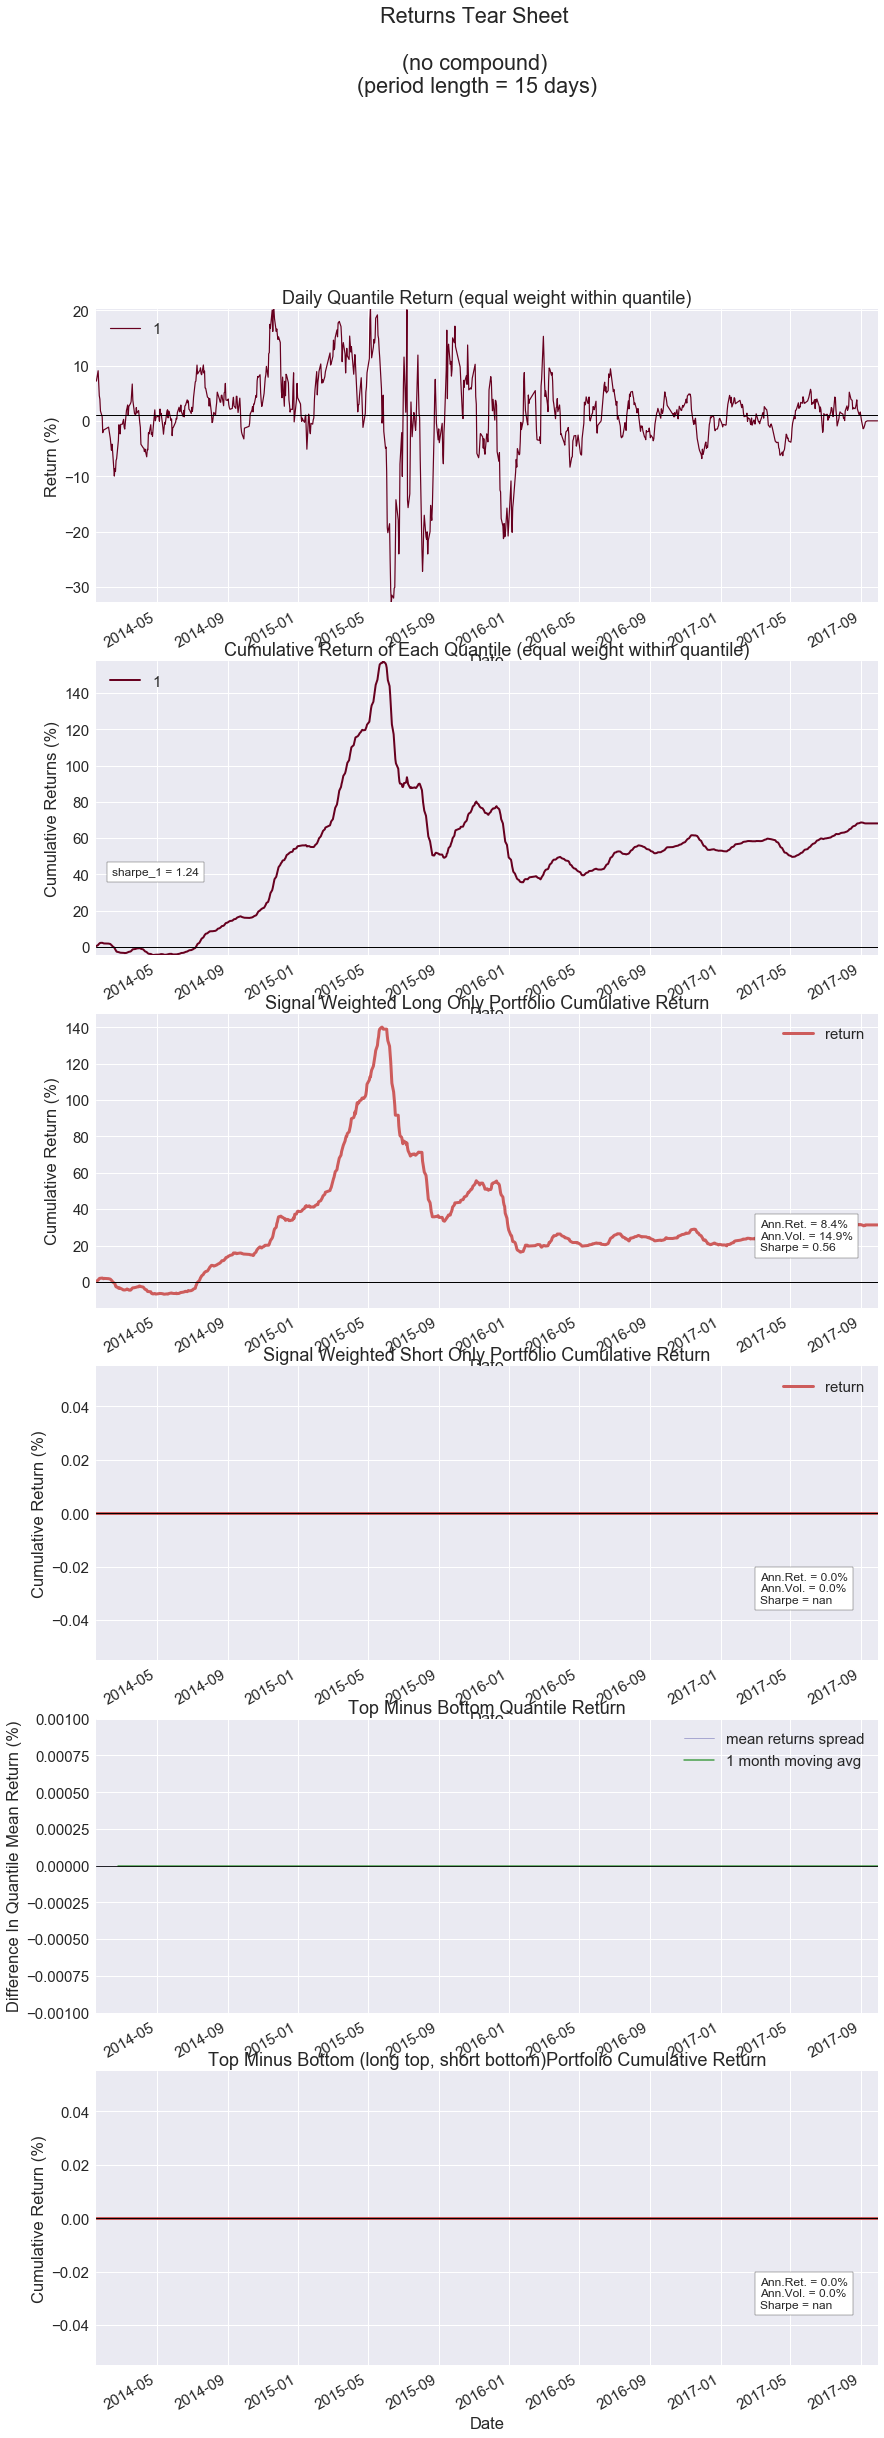

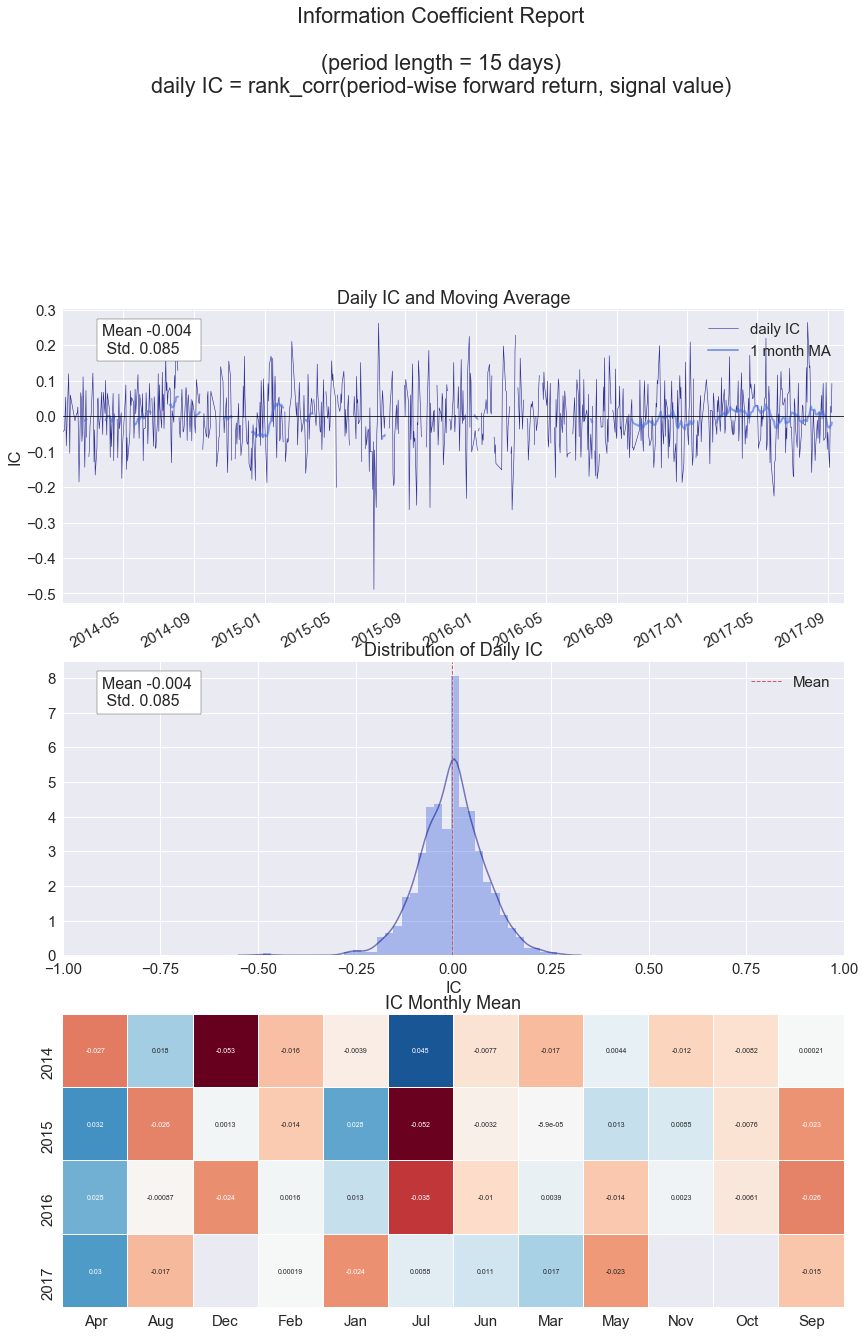

In [10]:
# 可视化
import matplotlib.pyplot as plt
obj.create_full_report()
plt.show()